0.5093795093795094


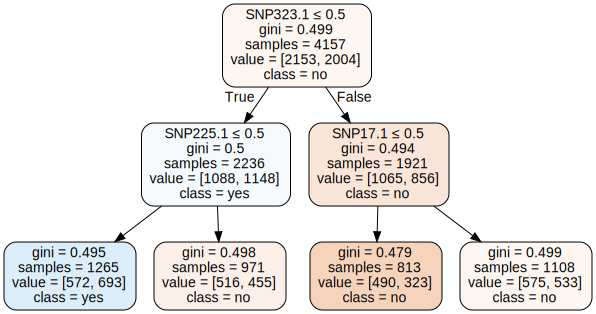

In [3]:
import pandas as pd
import sklearn
import sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree
import graphviz

data = pd.read_csv('final.csv', sep=";")
y = data.pop('index_OfBMI').values == 2
X = pd.DataFrame()
for c in data.columns:
  if c.startswith("SNP"):
    X[c] = data[c].str.contains("C|G")
  #if c == "sex":
  #  X["female"] = data[c] == 2
  #if c == "AGE":
  #  X["age"] = data["AGE"]

X_train, X_test, y_train, y_test = \
  sklearn.model_selection.train_test_split(X, y, random_state=1)

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))


dot_data = sklearn.tree.export_graphviz(clf, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['no', 'yes'],  
                      filled=True, rounded=True,
                      special_characters=True) 

graphviz.Source(dot_data) 